Cual es la tendencia de las habilidades para analistas de datos?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r'C:\Users\Territorio DSC\Desktop\Python codes\Python practices - Data science\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Limpiar columna de skills
def parse_job_skills(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    return skills

# Aplicar la función a la columna
df['job_skills'] = df['job_skills'].apply(parse_job_skills)

# Se emplea el metodo explode para separar las habiliades individualmente
df_exploted = df.explode('job_skills').copy()

In [3]:
# Filtramos solo para analistas de datos en USA
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Agregamos las columnas de los meses
df_DA_USA['Month_num'] = df_DA_USA['job_posted_date'].dt.month
df_DA_USA['Month_name'] = df_DA_USA['job_posted_date'].dt.month_name()

# Hacemos el explode para separar las habilidades
df_DA_USA_exploded = df_DA_USA.explode('job_skills').copy()

In [4]:
# Organizamos en una tabla dinamica
df_DA_USA_pivot = df_DA_USA_exploded.pivot_table(
    index = 'Month_num',
    columns = 'job_skills',
    aggfunc = 'size',
    fill_value = 0
    )

# Creamos una ultima fila donde sumamos el total de empleos por habilidad
df_DA_USA_pivot.loc['Total'] = df_DA_USA_pivot.sum()

# Ordenamos el total de mayor a menor
df_DA_USA_pivot = df_DA_USA_pivot[df_DA_USA_pivot.loc['Total'].sort_values(ascending = False).index]

# Eliminamos fila del Total
df_DA_USA_pivot = df_DA_USA_pivot.drop('Total', axis = 0)

# Especificamos la cantidad de habilidades
df_DA_USA_pivot = df_DA_USA_pivot.iloc[: , 0:5]

df_DA_USA_pivot

job_skills,sql,excel,tableau,python,sas
Month_num,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


<Axes: xlabel='Month_num'>

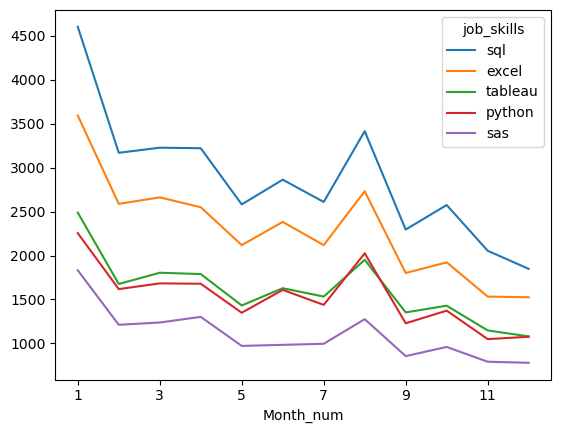

In [5]:
df_DA_USA_pivot.plot(kind='line')

In [6]:
# Se saca el total de empleos por mes
DA_totals = df_DA_USA.groupby('Month_num').agg('size')

DA_totals

Month_num
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [7]:
# Se divide cada cantidad de empleos por habilidad, con el total de empleos por mes
df_DA_USA_percent = df_DA_USA_pivot.div((DA_totals / 100), axis = 0)

# Se reinicia el index
df_DA_USA_percent.reset_index(inplace=True)

# Se crea la columna de los nombres de los meses
df_DA_USA_percent['Month_name'] = df_DA_USA_percent['Month_num'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))

# Se asigna la columna de los nombres de los meses como el nuevo index
df_DA_USA_percent = df_DA_USA_percent.set_index('Month_name')

# Se elimina la columna del numero de mes
df_DA_USA_percent = df_DA_USA_percent.drop(labels = 'Month_num' ,axis = 1)

df_DA_USA_percent

job_skills,sql,excel,tableau,python,sas
Month_name,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


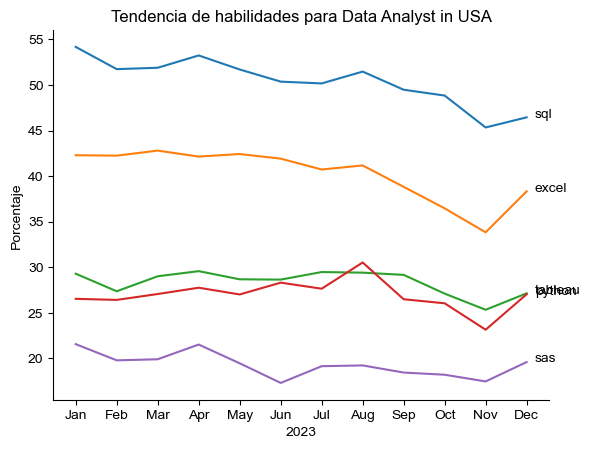

In [8]:
# Graficamos
df_plot = df_DA_USA_percent.copy()

sns.lineplot(data = df_plot,
             dashes = False,
             palette = 'tab10',
             legend = False)
plt.title('Tendencia de habilidades para Data Analyst in USA')
plt.xlabel('2023')
plt.ylabel('Porcentaje')

# Especificar para cada linea si habilidad
for i in range(0, 5, 1):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

sns.set_style(style = 'ticks')
sns.despine()
plt.show()